Housing Data & Linear Regression Modeling 

By Kristen Davis

This is a linear regression model built on a publicly available [dataset](https://www.kaggle.com/quantbruce/real-estate-price-prediction)

# Libraries & Data Initialization

In [32]:
import pandas as pd 

#vizualization tools
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline  

#linear regression 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [3]:
#import data 
df = pd.read_csv('Realestate.csv')

#sanity check 
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Cleaning & EDA

In [4]:
#statistical summary of dataset
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [12]:
#nan value check
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Since this Kaggle dataset is meant for Linear Regression practice (not messy by design) there is no need to clean or process any of the data prior to building the Linear Regression. These checks confirm, I am however going to add a column that converts the listed price in the 'Y house price unit area' to a house price in the hundred thousands which is more similar to the format for housing I'm use to seeing.

In [26]:
#create a housing price in hundreds of thousands
df['HousePrice'] = df['Y house price of unit area'].apply(lambda x: x * 100000) 

#sanity check
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,HousePrice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3790000.0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,4220000.0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,4730000.0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5480000.0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,4310000.0


# Simple Linear Regression

The [four assumptions](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html) associated with Linear Regression are: 
1. Linearity: The relationship between X and the mean of Y is linear. 
2. Homoscedasticity: The variance of residual is the same for any value of X. 
3. Independence: Observations are independent of each other. 
4. Normality: For any fixed value of X, Y is normally distributed.


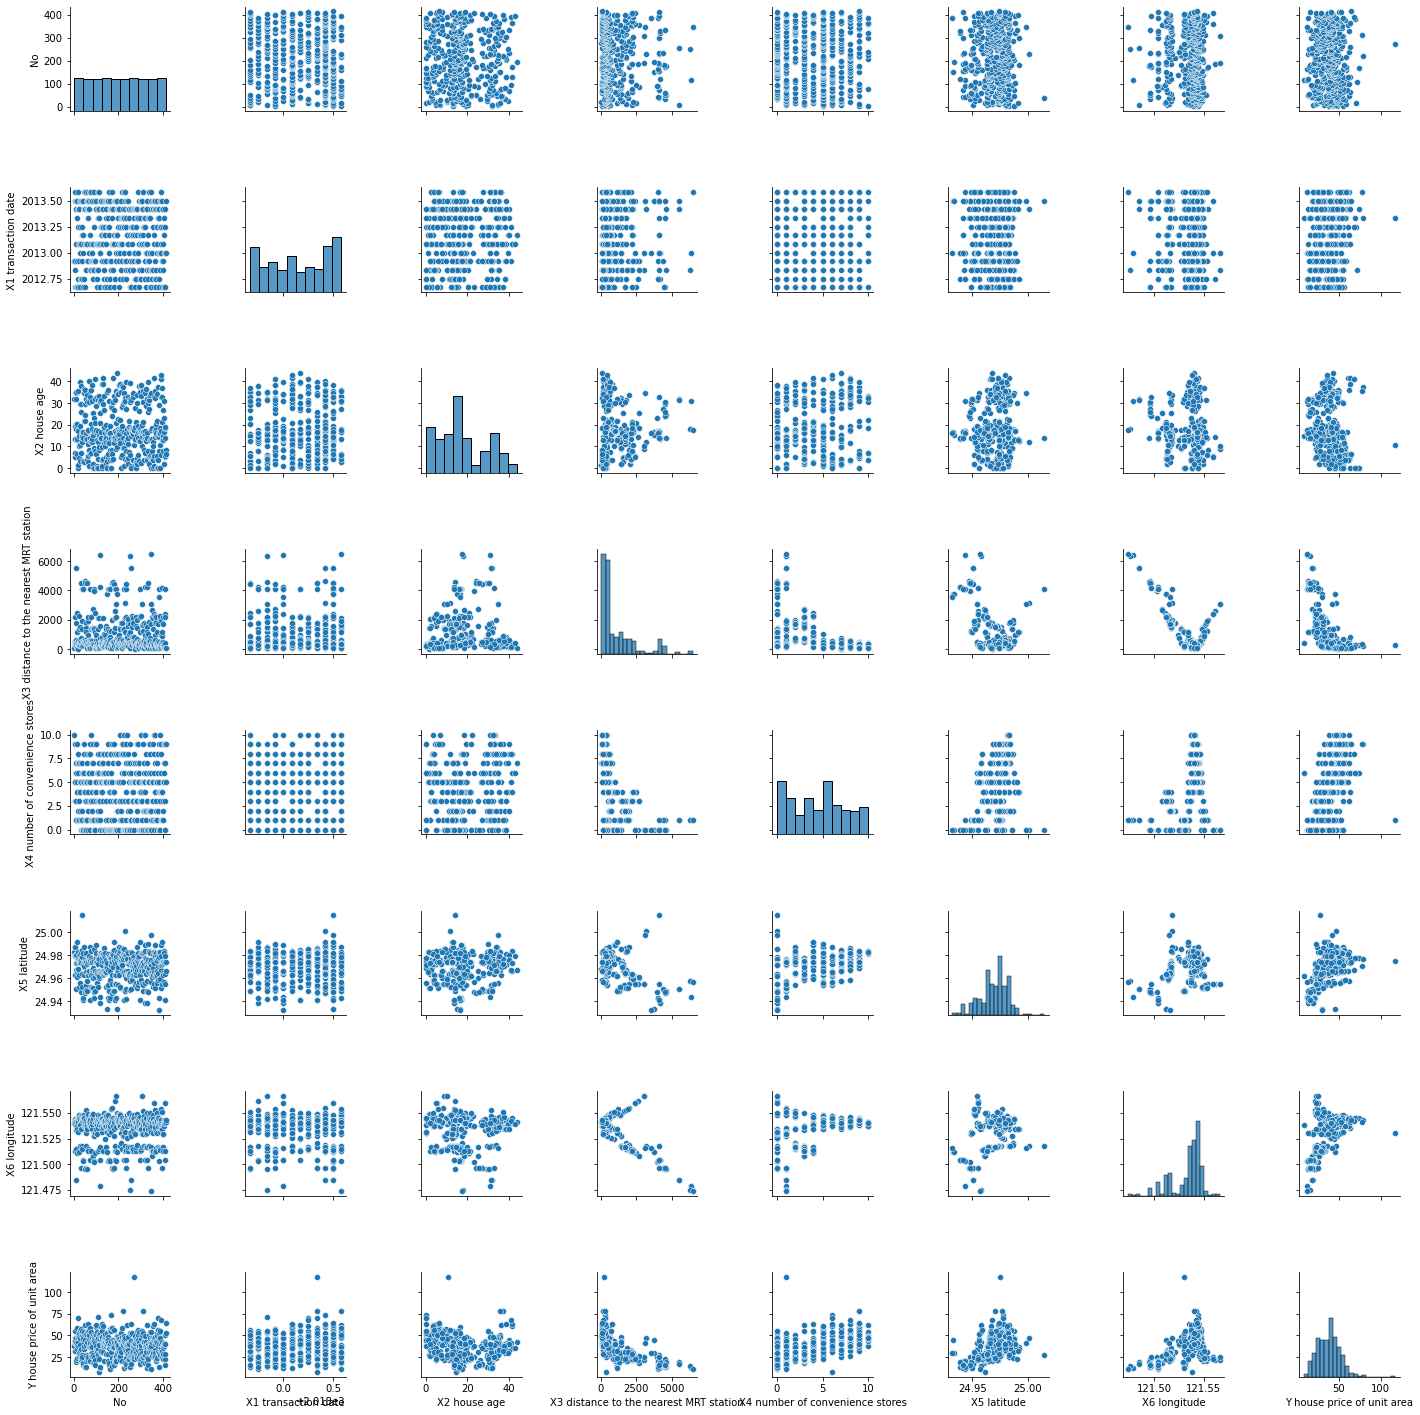

In [20]:
#visual check of relationships between variables 
sns.pairplot(df) 
plt.show()

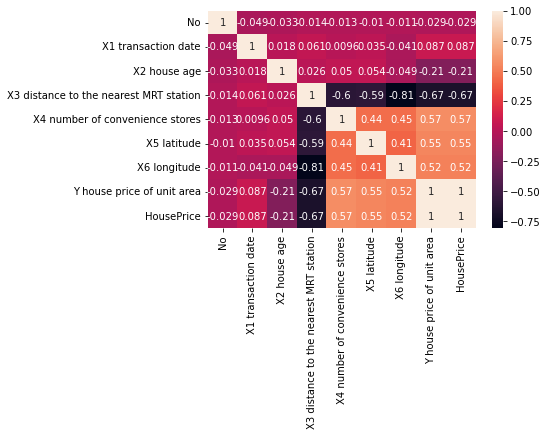

In [27]:
#heatmap to visualize column correlations
sns.heatmap(df.corr(),annot=True)

From this plot you can see a slight negative correlations between the House Age and the price of the house, which on gut check makes sense (older houses tend to slightly depreciate in value). The correlation I was not expecting to see was that the strongest positive correlation between columns comes from the number of convenience stores in the area. This could be an indication of a more urban home area.

In [29]:
X = df[['X4 number of convenience stores']] #independent variable
y = df[['HousePrice']] #dependent variable

In [33]:
#create validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, 
                                                    random_state=42)

In [36]:
#initiate model 
model = LinearRegression().fit(X_train, y_train)

#r squared score 
rsq = model.score(X_train, y_train)
print(f'Coefficient of Determination: {rsq}') 

#intercept  
print(f'Y Intercept: {model.intercept_}')
      
#slope 
print(f'Line Slope: {model.coef_}')

Coefficient of Determination: 0.2972488427245086
Y Intercept: [2760625.73705464]
Line Slope: [[277093.87842619]]


In [41]:
#predict housing prices 
y_pred = model.predict(X_train)  

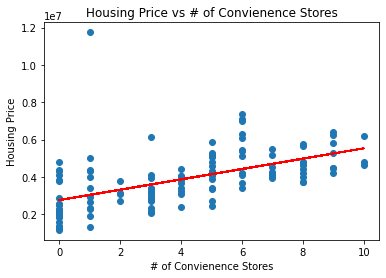

In [44]:
#visualize model training data
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red') 
plt.title('Housing Price vs # of Convienence Stores')
plt.xlabel('# of Convienence Stores') 
plt.ylabel('Housing Price')
plt.show()

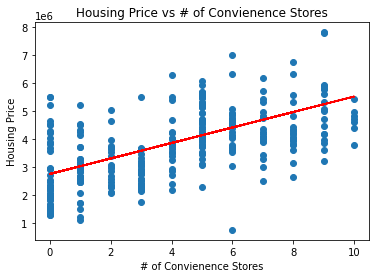

In [46]:
#visualize model testing data
plt.scatter(X_test, y_test)
plt.plot(X_train, y_pred, color='red') 
plt.title('Housing Price vs # of Convienence Stores')
plt.xlabel('# of Convienence Stores') 
plt.ylabel('Housing Price')
plt.show()